Long First Point                    -123.291565
Lat First Point                       44.268664
Region First Point     USGS_13_n45w124_20220426
Long Second Point                    -123.27135
Lat Second Point                      44.268082
Region Second Point    USGS_13_n45w124_20220426
Name: 20, dtype: object


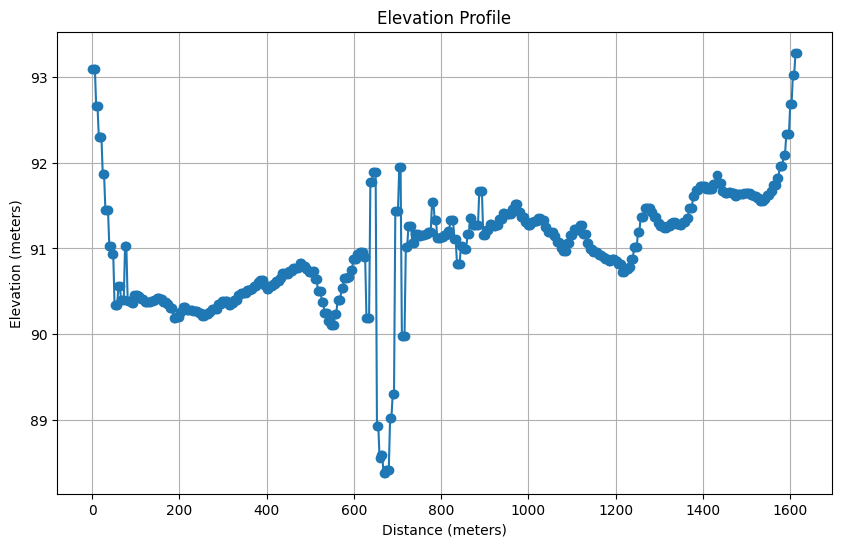

In [3]:
import pandas as pd
import numpy as np
import rasterio
from geopy.distance import geodesic
import matplotlib.pyplot as plt

BASE_PATH = "F:/Big_Data_Preprocessing/Water/Cross_Section/"

# Function to calculate geodesic distances in batch
def calculate_distances(path):
    return np.cumsum(
        [0] + [geodesic(path[i], path[i + 1]).meters for i in range(len(path) - 1)]
    )


def generate_path(start, end, num_points):
    latitudes = np.linspace(start[0], end[0], num_points)
    longitudes = np.linspace(start[1], end[1], num_points)
    path = list(zip(longitudes, latitudes))
    return path

data = pd.read_excel('../Data/Excel/longtomriver.xlsx', index_col=0)

for i in range(20, 21):
    print(data.iloc[i])
    # River_Mile = data.iloc[i]["River Mile"]
    Long_First_Point = float(data.iloc[i]["Long First Point"])
    Lat_First_Point = float(data.iloc[i]["Lat First Point"])
    Region_First_Point = data.iloc[i]["Region First Point"]
    Long_Second_Point = float(data.iloc[i]["Long Second Point"])
    Lat_Second_Point = float(data.iloc[i]["Lat Second Point"])
    Region_Second_Point = data.iloc[i]["Region Second Point"]
    First_Point = (Lat_First_Point, Long_First_Point)
    Second_Point = (Lat_Second_Point, Long_Second_Point)
    Distance = geodesic(First_Point, Second_Point).meters
    path = generate_path(First_Point, Second_Point, int(Distance/3))
    srtm_file = '../Data/GeoTIFF/' + Region_First_Point + '.tif'
    elevations = []
    with rasterio.open(srtm_file) as dataset:
        for lon, lat in path:
            row, col = dataset.index(lon, lat)
            elevations.append(dataset.read(1)[row, col])

    distances = [geodesic((path[i][1], path[i][0]), (path[i+1][1], path[i+1][0])).meters for i in range(len(path) - 1)]
    total_distance = sum(distances)
    fig = plt.figure(figsize=(10, 6))
    try:
        plt.plot(np.cumsum([0] + distances), elevations, marker='o')
    except: continue
    plt.xlabel('Distance (meters)')
    plt.ylabel('Elevation (meters)')
    plt.title('Elevation Profile')
    plt.grid(True)
    plt.show()
    name = i
    fig.savefig(f'../Output_LongTom/Image/ID_{name+1}.png')
    df = pd.DataFrame(columns = ["Depth", "Distance"])
    distances = np.cumsum([0] + distances)
    for i in range(len(elevations)):
        elevation = elevations[i]
        distance = distances[i]
        df.loc[i] = [elevation, distance]
    df.head()
    df.to_excel(f'../Output_LongTom/Excel/ID_{name+1}.xlsx')


Long First Point                    -122.728882
Lat First Point                       44.095106
Region First Point     USGS_13_n45w123_20220426
Long Second Point                    -122.71652
Lat Second Point                      44.081165
Region Second Point    USGS_13_n45w123_20220426
Name: 39, dtype: object


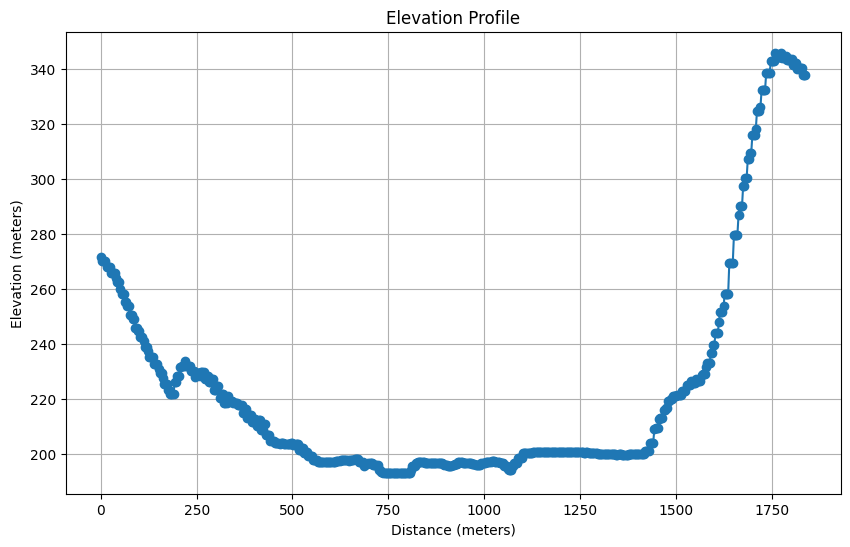

Long First Point                    -122.742471
Lat First Point                       44.071507
Region First Point     USGS_13_n45w123_20220426
Long Second Point                   -122.748478
Lat Second Point                      44.088481
Region Second Point    USGS_13_n45w123_20220426
Name: 40, dtype: object


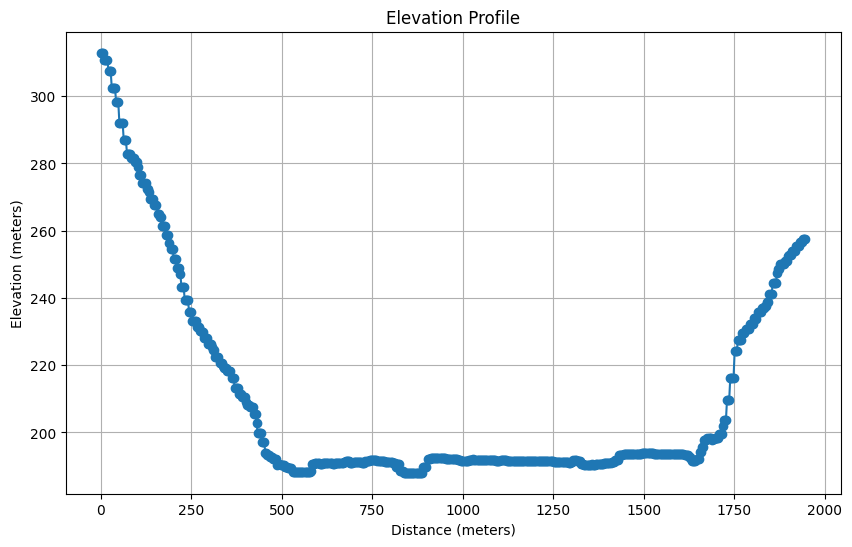

Long First Point                    -122.775202
Lat First Point                       44.083392
Region First Point     USGS_13_n45w123_20220426
Long Second Point                   -122.769456
Lat Second Point                      44.065276
Region Second Point    USGS_13_n45w123_20220426
Name: 41, dtype: object


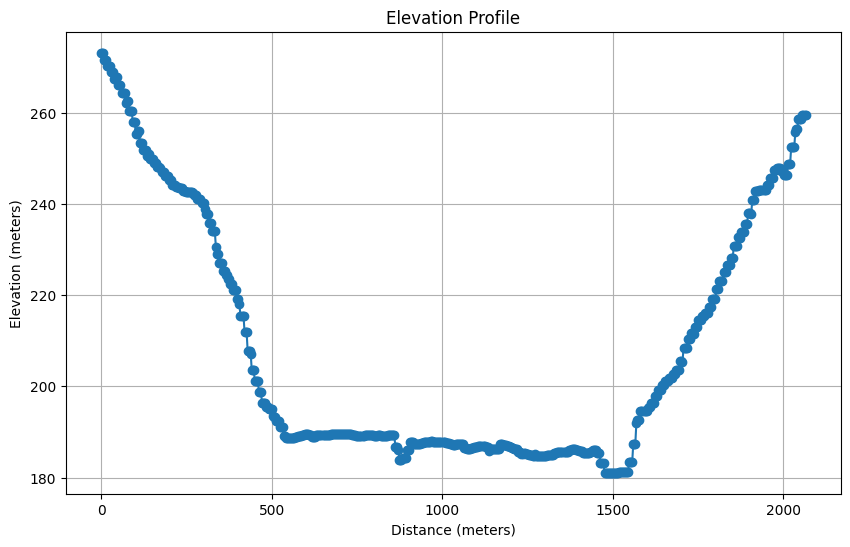

In [3]:
import pandas as pd
import numpy as np
import rasterio
from geopy.distance import geodesic
import matplotlib.pyplot as plt

BASE_PATH = "F:/Big_Data_Preprocessing/Water/Cross_Section/"

# Function to calculate geodesic distances in batch
def calculate_distances(path):
    return np.cumsum(
        [0] + [geodesic(path[i], path[i + 1]).meters for i in range(len(path) - 1)]
    )


def generate_path(start, end, num_points):
    latitudes = np.linspace(start[0], end[0], num_points)
    longitudes = np.linspace(start[1], end[1], num_points)
    path = list(zip(longitudes, latitudes))
    return path

data = pd.read_excel('../Data/Excel/Mckenzie_MC.xlsx', index_col=0)

for i in range(39, int(data.shape[0]/4 * 3)):
    print(data.iloc[i])
    # River_Mile = data.iloc[i]["River Mile"]
    Long_First_Point = float(data.iloc[i]["Long First Point"])
    Lat_First_Point = float(data.iloc[i]["Lat First Point"])
    Region_First_Point = data.iloc[i]["Region First Point"]
    Long_Second_Point = float(data.iloc[i]["Long Second Point"])
    Lat_Second_Point = float(data.iloc[i]["Lat Second Point"])
    Region_Second_Point = data.iloc[i]["Region Second Point"]
    First_Point = (Lat_First_Point, Long_First_Point)
    Second_Point = (Lat_Second_Point, Long_Second_Point)
    Distance = geodesic(First_Point, Second_Point).meters
    path = generate_path(First_Point, Second_Point, int(Distance/3))
    srtm_file = '../Data/GeoTIFF/' + Region_First_Point + '.tif'
    elevations = []
    with rasterio.open(srtm_file) as dataset:
        for lon, lat in path:
            row, col = dataset.index(lon, lat)
            elevations.append(dataset.read(1)[row, col])

    distances = [geodesic((path[i][1], path[i][0]), (path[i+1][1], path[i+1][0])).meters for i in range(len(path) - 1)]
    total_distance = sum(distances)
    fig = plt.figure(figsize=(10, 6))
    try:
        plt.plot(np.cumsum([0] + distances), elevations, marker='o')
    except: continue
    plt.xlabel('Distance (meters)')
    plt.ylabel('Elevation (meters)')
    plt.title('Elevation Profile')
    plt.grid(True)
    plt.show()
    name = i
    fig.savefig(f'../Output_Mckenzie/Image/ID_{name+1}.png')
    df = pd.DataFrame(columns = ["Depth", "Distance"])
    distances = np.cumsum([0] + distances)
    for i in range(len(elevations)):
        elevation = elevations[i]
        distance = distances[i]
        df.loc[i] = [elevation, distance]
    df.head()
    df.to_excel(f'../Output_Mckenzie/Excel/ID_{name+1}.xlsx')
